In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import antidistil
import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(antidistil)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [3]:
train_dataloader, test_dataloader = pipeline.get_data()

In [4]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'zero')
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/zero_5_{i}.pt')

Model 5
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Validation accuracy: 61.5%, Validation loss: 1.362424 

Epoch 2
-------------------------------


Validation accuracy: 63.5%, Validation loss: 1.185194 

Epoch 3
-------------------------------


Validation accuracy: 64.0%, Validation loss: 1.120437 

Epoch 4
-------------------------------


Validation accuracy: 64.1%, Validation loss: 1.087593 

Epoch 5
-------------------------------


Validation accuracy: 66.0%, Validation loss: 1.050741 

Epoch 6
-------------------------------


Validation accuracy: 71.3%, Validation loss: 0.908099 

Epoch 7
-------------------------------


Validation accuracy: 72.0%, Validation loss: 0.857996 

Epoch 8
-------------------------------


Validation accuracy: 72.4%, Validation loss: 0.832554 

Epoch 9
-------------------------------


Validation accuracy: 72.7%, Validation loss: 0.817165 

Epoch 10
-------------------------------


Validation accuracy: 72.9%, Validation loss: 0.807138 

Epoch 11
-------------------------------


Validation accuracy: 73.1%, Validation loss: 0.799188 

Epoch 12
-------------------------------


Validation accuracy: 73.2%, Validation loss: 0.792409 

Epoch 13
-------------------------------


Validation accuracy: 73.3%, Validation loss: 0.786769 

Epoch 14
-------------------------------


Validation accuracy: 73.5%, Validation loss: 0.782323 

Epoch 15
-------------------------------


Validation accuracy: 73.6%, Validation loss: 0.778478 

Epoch 16
-------------------------------


Validation accuracy: 73.7%, Validation loss: 0.775045 

Epoch 17
-------------------------------


Validation accuracy: 73.7%, Validation loss: 0.771790 

Epoch 18
-------------------------------


Validation accuracy: 73.9%, Validation loss: 0.768556 

Epoch 19
-------------------------------


Validation accuracy: 73.9%, Validation loss: 0.765871 

Epoch 20
-------------------------------


Validation accuracy: 73.9%, Validation loss: 0.763456 

Epoch 21
-------------------------------


Validation accuracy: 74.1%, Validation loss: 0.761268 

Epoch 22
-------------------------------


Validation accuracy: 74.2%, Validation loss: 0.759089 

Epoch 23
-------------------------------


Validation accuracy: 74.2%, Validation loss: 0.756779 

Epoch 24
-------------------------------


Validation accuracy: 74.2%, Validation loss: 0.755002 

Epoch 25
-------------------------------


Validation accuracy: 74.3%, Validation loss: 0.753276 

Epoch 26
-------------------------------


Validation accuracy: 74.3%, Validation loss: 0.751724 

Epoch 27
-------------------------------


Validation accuracy: 74.4%, Validation loss: 0.750095 

Epoch 28
-------------------------------


Validation accuracy: 74.4%, Validation loss: 0.748256 

Epoch 29
-------------------------------


Validation accuracy: 74.4%, Validation loss: 0.746573 

Epoch 30
-------------------------------


Validation accuracy: 74.4%, Validation loss: 0.745072 



FSGM Accuracy [0.7444, 0.7302, 0.7158, 0.696, 0.6762, 0.6509, 0.6246, 0.5988, 0.5664, 0.5342]


Noise Accuracy [0.7444, 0.7361, 0.7156, 0.6708, 0.5801, 0.5803, 0.5097, 0.4454, 0.4133, 0.3479]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


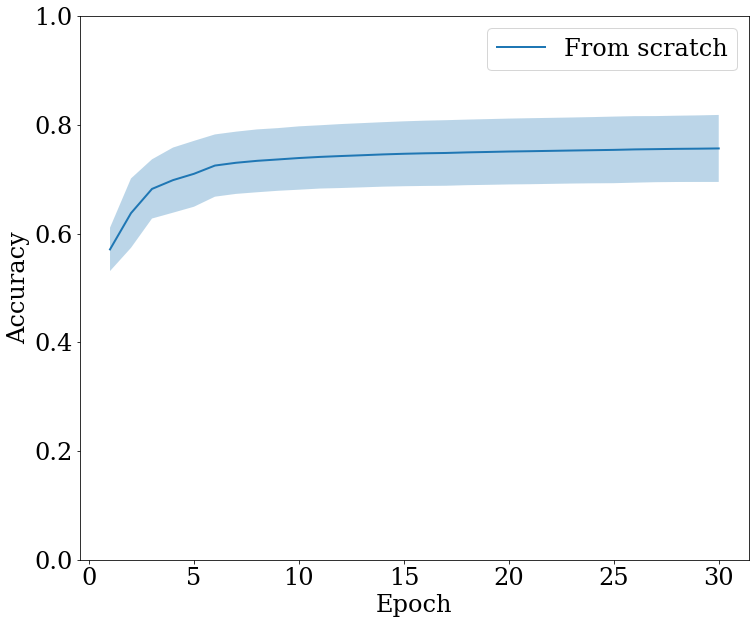

In [11]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

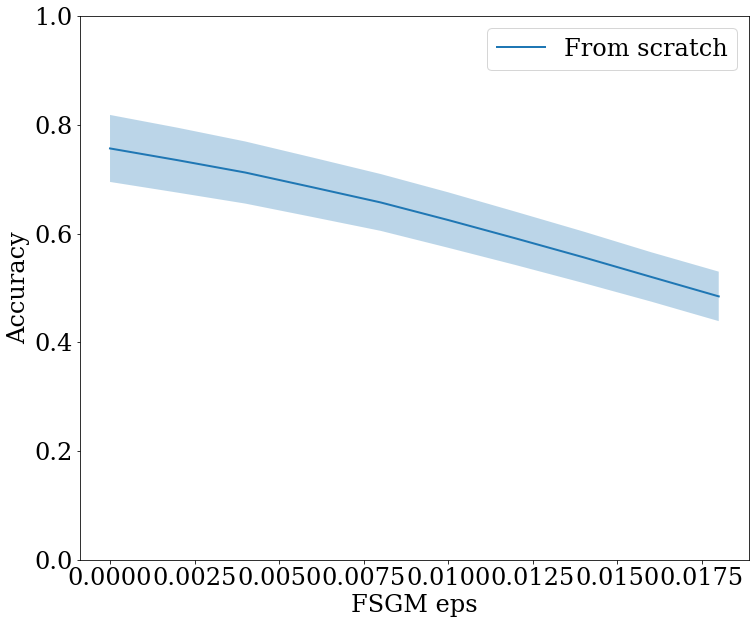

In [12]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

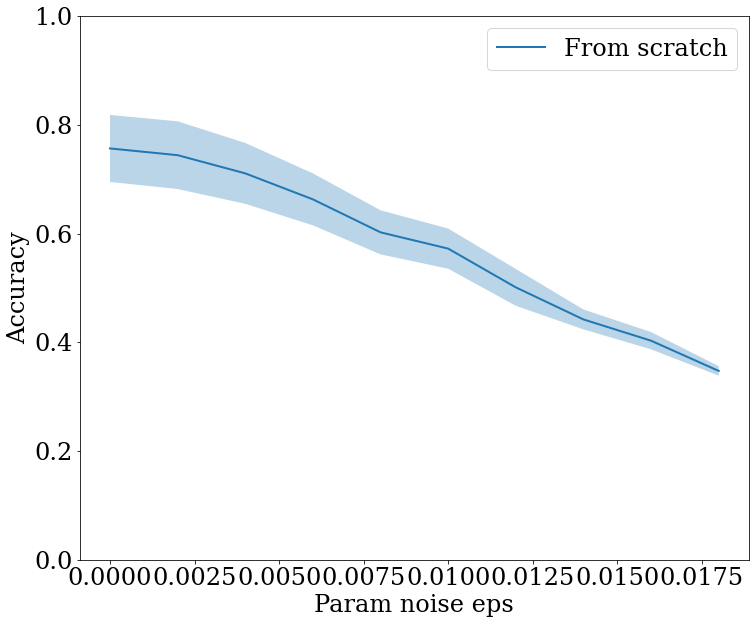

In [13]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [14]:
with open(pipeline.get_path()+'/history_5_zero.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)
for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    teacher = pipeline.make_teacher_model()
    teacher.load_state_dict(torch.load(pipeline.get_path()+f'/teacher_5cl_{i}.pt'))
    model = antidistil.simple_baseline_change_weights(teacher, 'uniform')
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)
    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/uniform_5_{i}.pt')

Model 5
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Validation accuracy: 63.8%, Validation loss: 1.165659 

Epoch 2
-------------------------------


Validation accuracy: 64.5%, Validation loss: 1.065012 

Epoch 3
-------------------------------


Validation accuracy: 64.8%, Validation loss: 1.033181 

Epoch 4
-------------------------------


Validation accuracy: 65.0%, Validation loss: 1.016066 

Epoch 5
-------------------------------


Validation accuracy: 65.2%, Validation loss: 1.005303 

Epoch 6
-------------------------------


Validation accuracy: 65.3%, Validation loss: 0.997693 

Epoch 7
-------------------------------


Validation accuracy: 65.4%, Validation loss: 0.992113 

Epoch 8
-------------------------------


Validation accuracy: 65.5%, Validation loss: 0.986991 

Epoch 9
-------------------------------


Validation accuracy: 65.5%, Validation loss: 0.982424 

Epoch 10
-------------------------------


Validation accuracy: 65.5%, Validation loss: 0.979754 

Epoch 11
-------------------------------


Validation accuracy: 65.6%, Validation loss: 0.976531 

Epoch 12
-------------------------------


Validation accuracy: 65.7%, Validation loss: 0.973666 

Epoch 13
-------------------------------


Validation accuracy: 65.7%, Validation loss: 0.971020 

Epoch 14
-------------------------------


Validation accuracy: 65.7%, Validation loss: 0.968724 

Epoch 15
-------------------------------


Validation accuracy: 65.7%, Validation loss: 0.966528 

Epoch 16
-------------------------------


Validation accuracy: 65.7%, Validation loss: 0.964447 

Epoch 17
-------------------------------


Validation accuracy: 65.7%, Validation loss: 0.963224 

Epoch 18
-------------------------------


Validation accuracy: 65.7%, Validation loss: 0.961450 

Epoch 19
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.959704 

Epoch 20
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.958044 

Epoch 21
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.956862 

Epoch 22
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.955235 

Epoch 23
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.954182 

Epoch 24
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.952402 

Epoch 25
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.951307 

Epoch 26
-------------------------------


Validation accuracy: 65.8%, Validation loss: 0.950234 

Epoch 27
-------------------------------


Validation accuracy: 65.9%, Validation loss: 0.949210 

Epoch 28
-------------------------------


Validation accuracy: 65.9%, Validation loss: 0.948243 

Epoch 29
-------------------------------


Validation accuracy: 65.9%, Validation loss: 0.947436 

Epoch 30
-------------------------------


Validation accuracy: 65.9%, Validation loss: 0.946487 



FSGM Accuracy [0.6594, 0.6488, 0.6343, 0.6213, 0.6042, 0.5854, 0.5661, 0.5467, 0.5246, 0.4992]


Noise Accuracy [0.6594, 0.658, 0.6431, 0.6299, 0.5755, 0.5313, 0.482, 0.4428, 0.3461, 0.3557]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


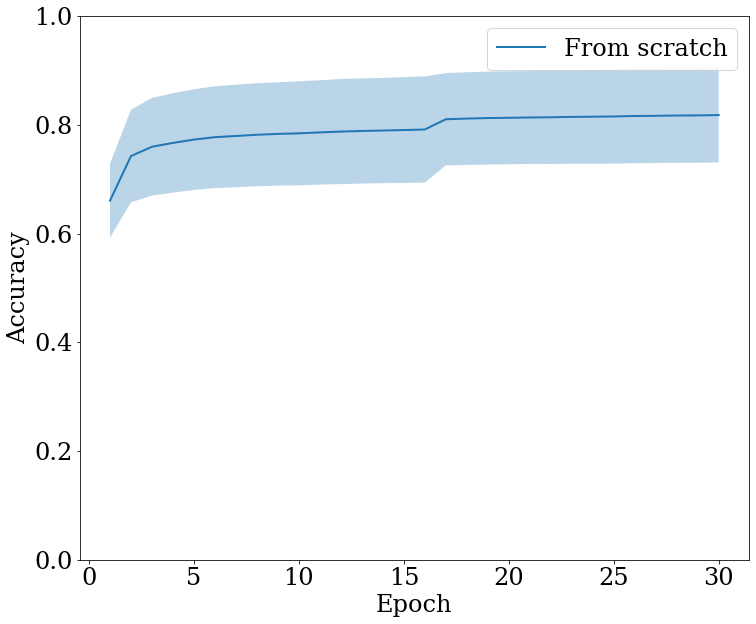

In [18]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs+1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

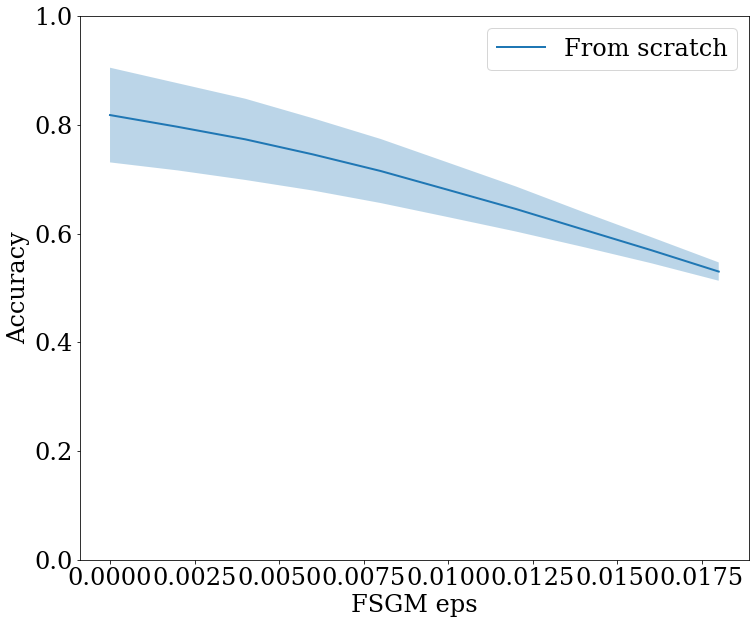

In [19]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

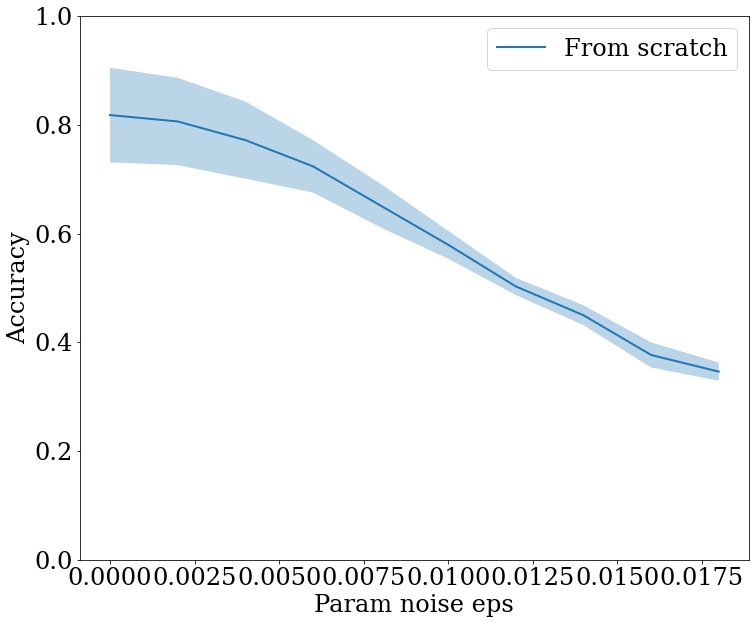

In [20]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [21]:
with open(pipeline.get_path()+'/history_5_uniform.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
